In [1]:
from glob import glob

import numpy as np
import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def calculate_moments(image):
    mean = np.mean(image)
    std_dev = np.std(image)
    skewness = np.mean((image - mean) ** 3) / (std_dev ** 3)
    kurtosis = np.mean((image - mean) ** 4) / (std_dev ** 4) - 3
    
    return mean, std_dev, skewness, kurtosis

In [3]:
def extract_color_features(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    h_mean, h_std, h_skewness, h_kurtosis = calculate_moments(hsv_image[:, :, 0])
    s_mean, s_std, s_skewness, s_kurtosis = calculate_moments(hsv_image[:, :, 1])
    v_mean, v_std, v_skewness, v_kurtosis = calculate_moments(hsv_image[:, :, 2])

    return [h_mean, h_std, h_skewness, h_kurtosis,
            s_mean, s_std, s_skewness, s_kurtosis,
            v_mean, v_std, v_skewness, v_kurtosis]

In [4]:
def extract_shape_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply Sobel operators to obtain the gradient image
    gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize = 3)
    gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize = 3)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Normalize gradient image to [0, 1]
    gradient_normalized = cv2.normalize(gradient_magnitude, None, 0, 1, cv2.NORM_MINMAX)

    return gradient_normalized

In [5]:
def extract_normalized_polar_histogram(gradient_image):
    # Compute edge gradients and orientations
    gradient_x = cv2.Sobel(gradient_image, cv2.CV_64F, 1, 0, ksize = 3)
    gradient_y = cv2.Sobel(gradient_image, cv2.CV_64F, 0, 1, ksize = 3)
    edge_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    edge_orientation = np.arctan2(gradient_y, gradient_x) * 180 / np.pi

    # Compute normalized polar histogram
    bins = np.arange(-180, 181, 45)
    histogram, _ = np.histogram(edge_orientation, bins = bins, weights = edge_magnitude, density = True)

    return histogram

In [8]:
# Image directories
nickels_cropped_dir = "./nickels_cropped/"
nickels_cropped_files = glob(f"{nickels_cropped_dir}/*")

quarters_cropped_dir = "./quarters_cropped/"
quarters_cropped_files = glob(f"{quarters_cropped_dir}/*")

cents_cropped_dir = "./cents_cropped/"
cents_cropped_files = glob(f"{cents_cropped_dir}/*")

In [9]:
img = np.asarray(Image.open(quarters_cropped_files[0]))

color_features = extract_color_features(img)
shape_features = extract_shape_features(img)
normalized_polar_histogram = extract_normalized_polar_histogram(shape_features)

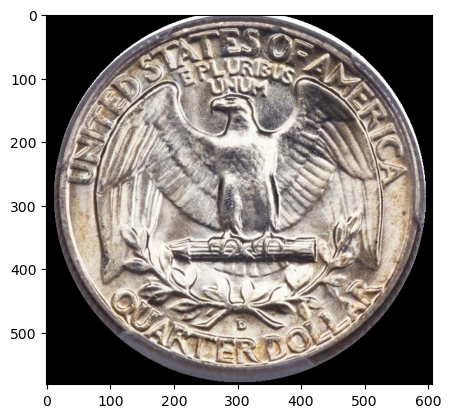

In [10]:
plt.imshow(img)

In [11]:
color_features

[29.260038740534984,
 49.59411852003136,
 2.122058106239825,
 2.84573657560282,
 26.445737689087327,
 29.18052148299251,
 3.3880201939738432,
 21.524955883746298,
 124.45053197230222,
 86.0570664837218,
 -0.22186089589753505,
 -1.2715951435577952]

In [14]:
normalized_polar_histogram

array([0.00244864, 0.0027266 , 0.00308215, 0.00287938, 0.00244468,
       0.00269306, 0.00307052, 0.00287719])

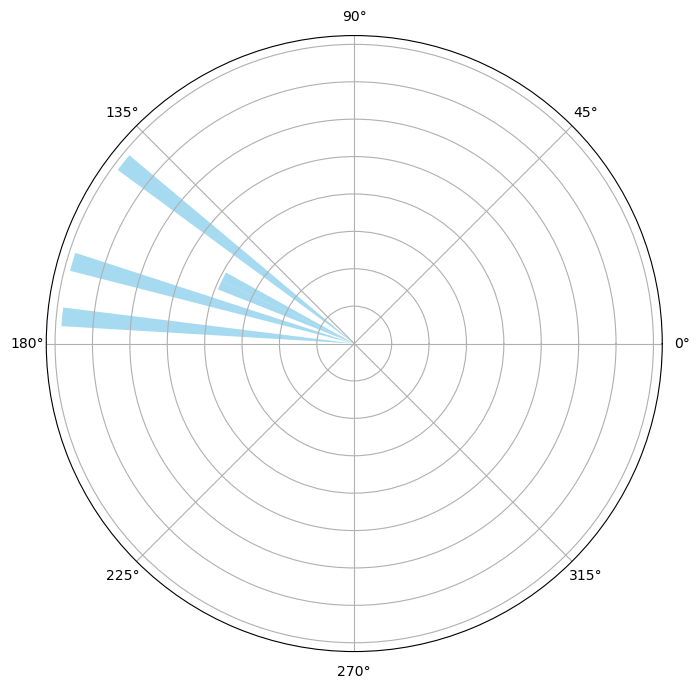

In [30]:
fig, ax = plt.subplots(subplot_kw = {'projection': 'polar'}, figsize = (8, 8))

n, bins, _ = ax.hist(normalized_polar_histogram*1000,
                     density = True, 
                     color = 'skyblue', 
                     alpha = 0.75)

# Normalize the histogram
ax.set_yticklabels([])  # Hide radial ticks
ax.set_rlabel_position(90)  # Move radial labels to the center
#ax.set_theta_offset(np.pi / 2)  # Set 0 degree to the top
#ax.set_theta_direction(-1)  # Reverse direction (clockwise)

plt.show()